In [22]:
#import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
# import plotly.express as px
# import plotly.graph_objects as go
import seaborn as sns

In [23]:
#read data
df = pd.read_csv('marketing_campaign.csv', sep='\t', index_col=0)
pd.set_option('display.max_columns', None)
df.head() #check if data is read successfully

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [24]:
# import os
# print(os.getcwd())


# **Data Analysis**

In [25]:
df.shape #shape of our dataset

(2240, 28)

In [26]:
df.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [27]:
#Check missing values 
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [28]:
# Check if rows with null Income share common characteristics that could inform decisions
df[df['Income'].isnull()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0


we have some null values in Income columns, 24null values out of +2k, for our case dropping all lines having null income will not affect our model training (the objectif of tis hackathon)

In [29]:
#Drop null values
print(f'Before dropping {df.shape}')
df = df.dropna(subset=['Income'])
print(f'After dropping {df.shape}')

Before dropping (2240, 28)
After dropping (2216, 28)


In [30]:
#cheeck datatypee
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Dt_Customer          2216 non-null   object 
 7   Recency              2216 non-null   int64  
 8   MntWines             2216 non-null   int64  
 9   MntFruits            2216 non-null   int64  
 10  MntMeatProducts      2216 non-null   int64  
 11  MntFishProducts      2216 non-null   int64  
 12  MntSweetProducts     2216 non-null   int64  
 13  MntGoldProds         2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null   int

For Dt_Customers as we ve seen in df.head() its a date, but here the datatype is object, python/our computer will not understaand that its aa daate, they will handle it as object

In [31]:
#Casting to data
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')
df.tail()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [32]:
#Delete unecessary columns
df.nunique()

Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

"Z_CostContact" and "Z_Revenue" have same value in all the rows that's why they are not going to contribute anything in the model building. So we can drop them. 

In [ ]:
#Drop Z_Revenue & Z_CostContct
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)
df.shape #check if columns are droppped {should return (_,26)}

(2216, 26)

# **Data Exploring**

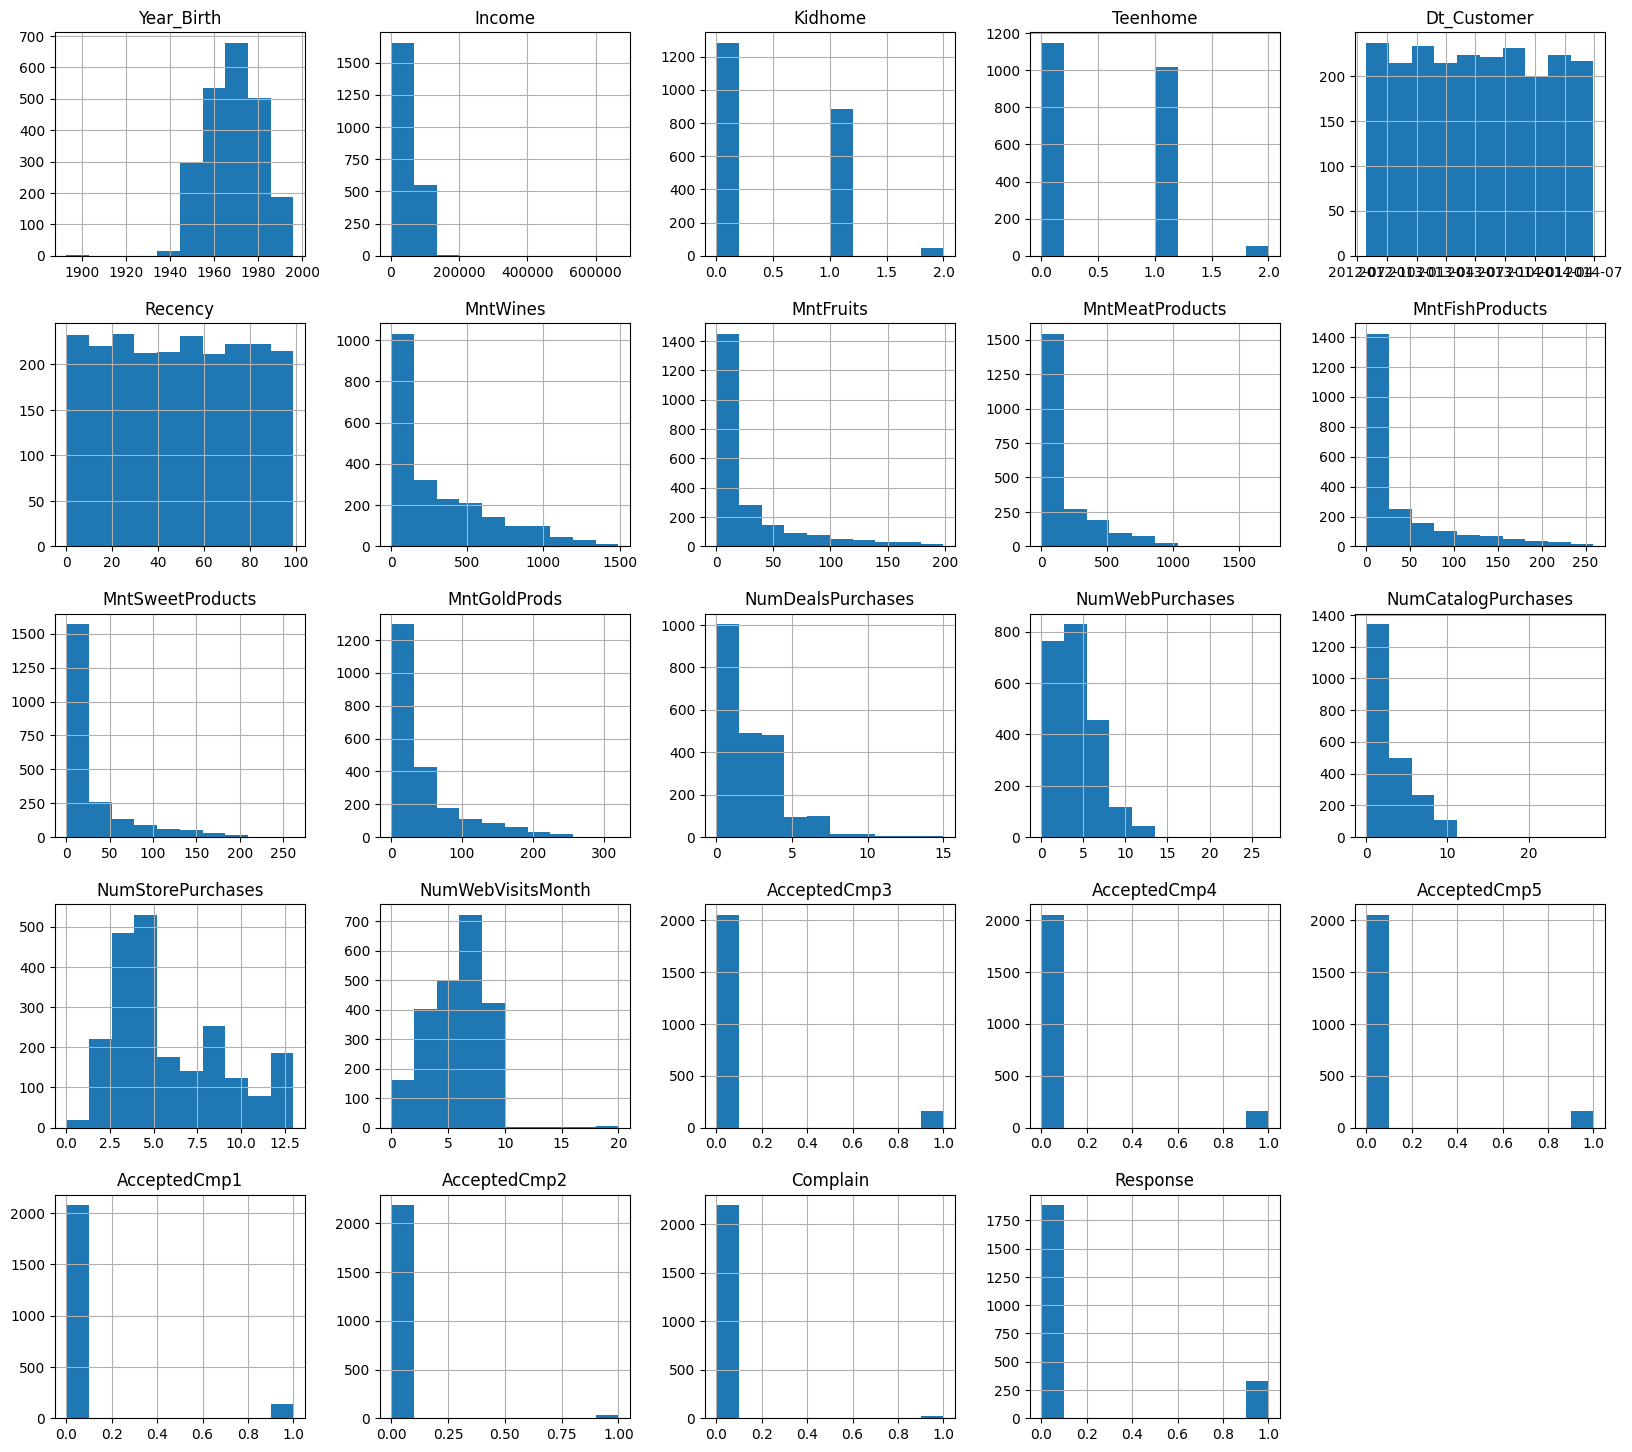

In [ ]:
#Ditribution of variables
df.hist(figsize=(20, 18))
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

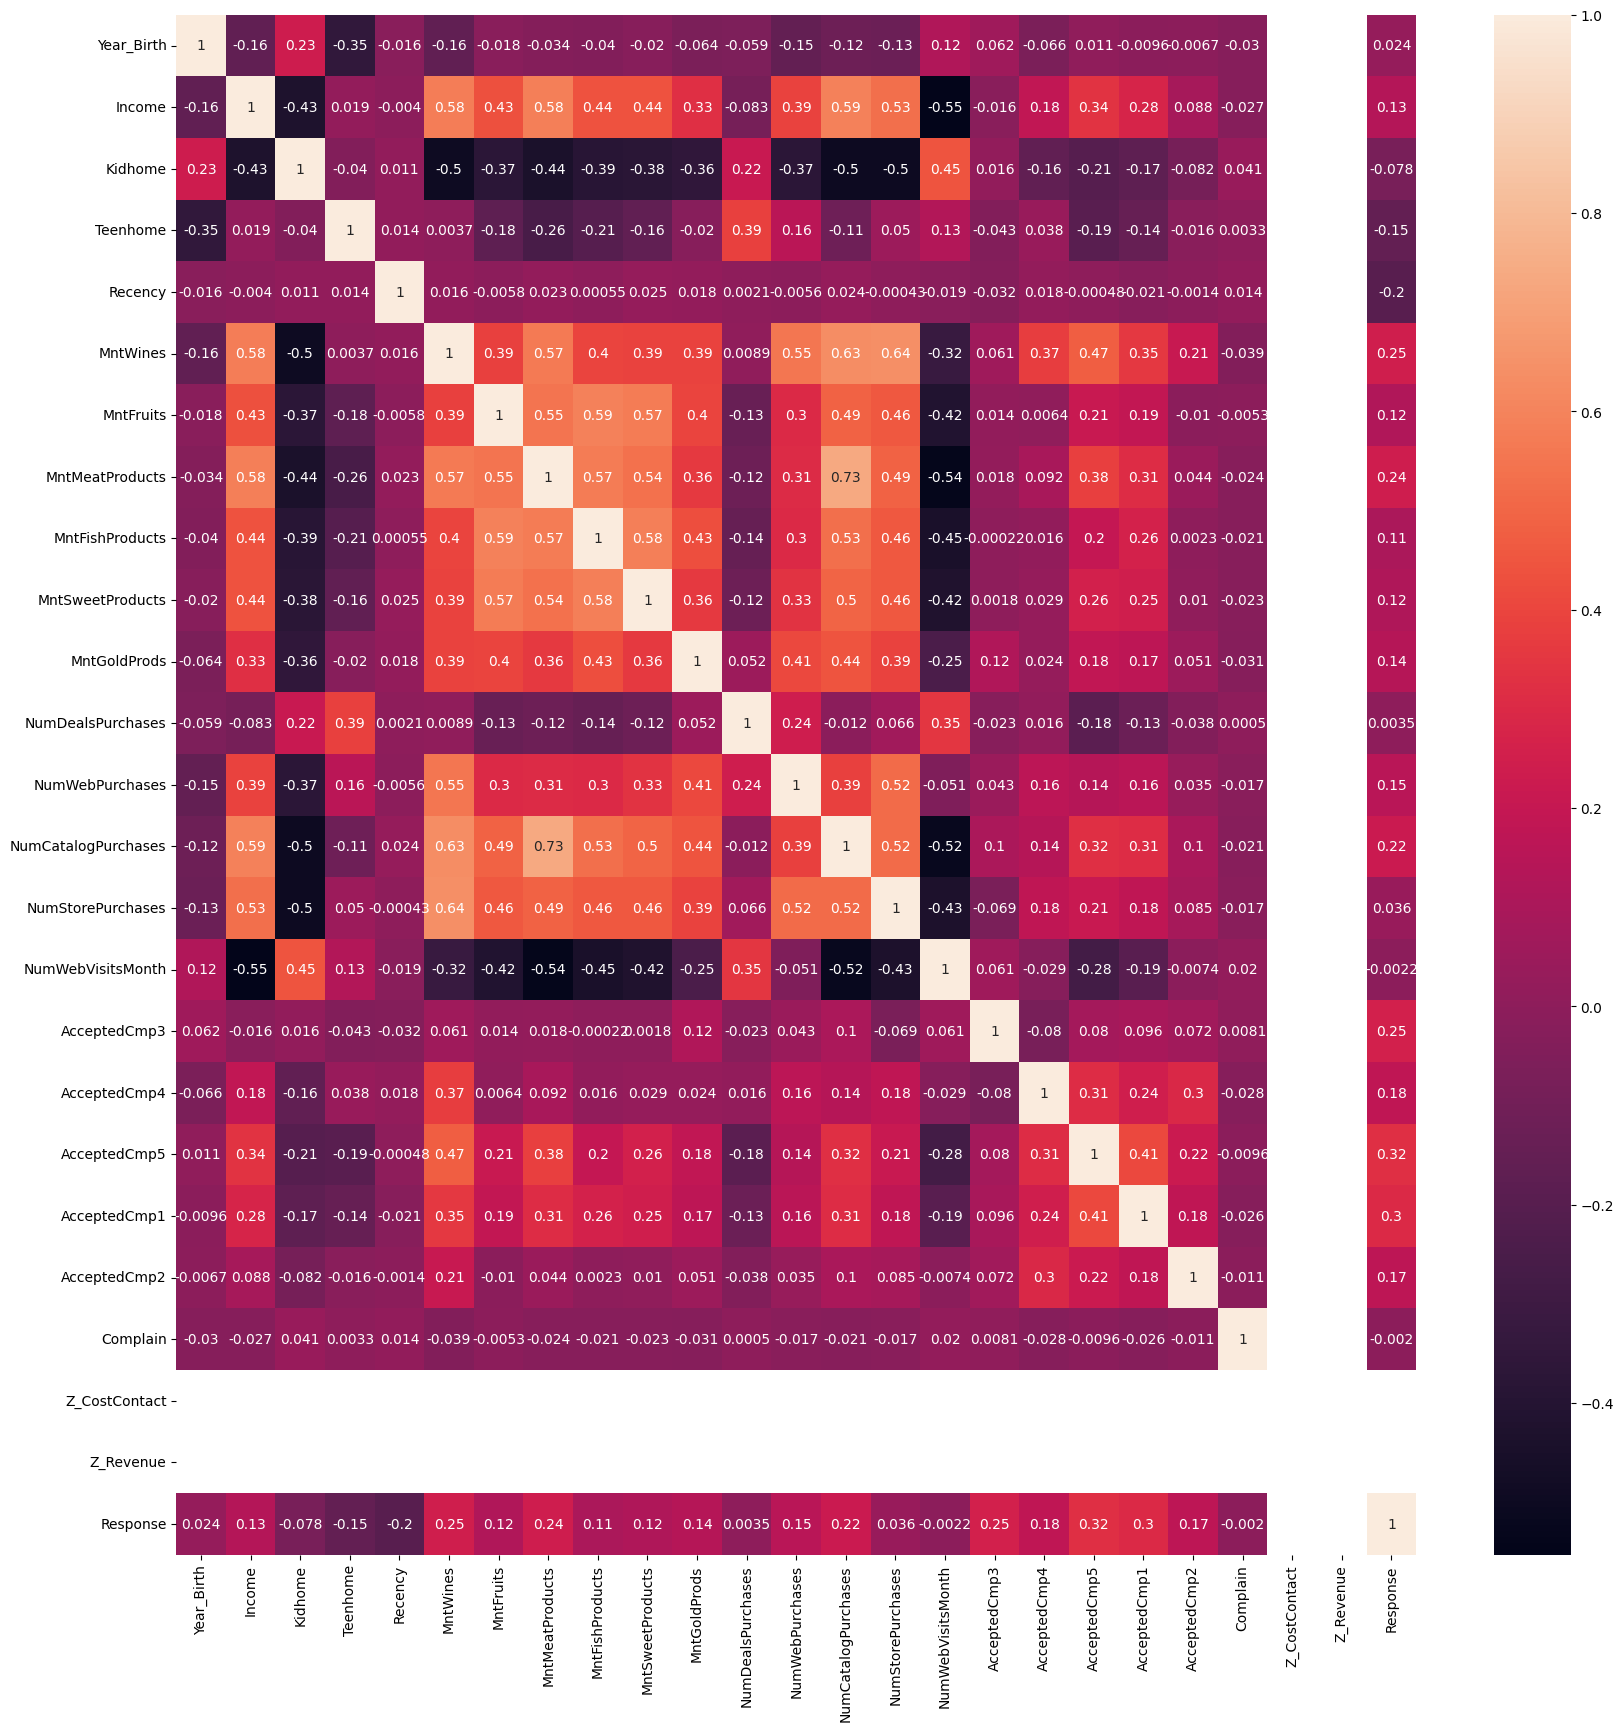

In [ ]:
# Finding the correlation between the feature column
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(20,20))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

In [ ]:
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[24:50:2]

MntMeatProducts      NumCatalogPurchases    0.734127
NumStorePurchases    MntWines               0.640012
MntWines             NumCatalogPurchases    0.634753
MntFruits            MntFishProducts        0.593431
NumCatalogPurchases  Income                 0.589162
MntMeatProducts      Income                 0.584633
MntSweetProducts     MntFishProducts        0.583867
Income               MntWines               0.578650
MntFishProducts      MntMeatProducts        0.573574
MntSweetProducts     MntFruits              0.571606
MntWines             MntMeatProducts        0.568860
                     NumWebPurchases        0.553786
NumWebVisitsMonth    Income                 0.553088
dtype: float64